In [68]:
# import libraries
import os
import re
import random
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from scripts.data_cleaning import clean_data
from scripts.feature_engineering import create_features
from scripts.visualization import dist_visualization
from scripts.encoders import LowDimFeature
from scripts.feature_engineering import make_mi_scores, plot_mi_scores


import warnings
warnings.filterwarnings('ignore')

In [69]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [70]:
train.set_index("id", inplace=True)
test.set_index("id", inplace=True)

In [71]:
def seed_everything(seed,
                    tensorflow_init=False,
                    pytorch_init=False):
    """
    Seeds basic parameters for reproducibility of results
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    if tensorflow_init is True:
        tf.random.set_seed(seed)
    if pytorch_init is True:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [72]:
SEED = 1971
seed_everything(SEED)

## DATA CLEANING

In [73]:
train_df = clean_data(train)
test_df = clean_data(test)

In [74]:
# feature importance



In [75]:
target = train_df["prod_taken"]
train = train_df.drop(columns=["prod_taken"])

In [80]:
train = train.fillna(-1)
# Label encoding for categoricals
for colname in train.select_dtypes("object"):
    train[colname], _ = train[colname].factorize()
    
discrete_features = train.dtypes == int

mi_scores = make_mi_scores(train, target, discrete_features)
mi_scores.index

Index(['designation', 'monthly_income', 'product_pitched', 'marital_status',
       'passport', 'age', 'children', 'occupation', 'duration_of_pitch',
       'number_of_followups', 'number_of_person_visiting',
       'preferred_property_star', 'gender', 'typeof_contact',
       'pitch_satisfaction_score', 'number_of_trips', 'car_ownership',
       'city_tier'],
      dtype='object')

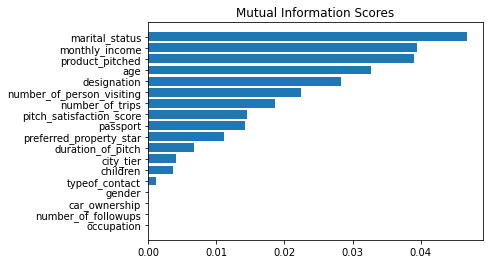

In [77]:
plot_mi_scores(mi_scores)

In [61]:
train_df.groupby("marital_status")["prod_taken"].mean()

marital_status
Divorced     0.116173
Married      0.098266
Single       0.334365
Unmarried    0.074010
Name: prod_taken, dtype: float64

In [65]:
train_df.groupby("prod_taken")["monthly_income"].min()

prod_taken
0    200000.0
1    240000.0
Name: monthly_income, dtype: float64

## eda

In [19]:
print('Not taken', round(train['prod_taken'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Taken', round(train['prod_taken'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

Not taken 85.76 % of the dataset
Taken 14.24 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Not taken || 1: taken)')

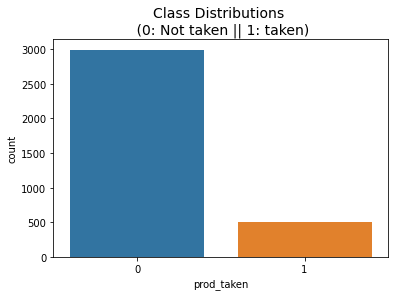

In [20]:
sns.countplot('prod_taken', data=train)
plt.title('Class Distributions \n (0: Not taken || 1: taken)', fontsize=14)

In [35]:
def check_nan(df):
    nan_val = df.isna().sum().to_dict()
    for col in df.columns:
        if nan_val[col]!=0:
           df[col].value_counts(dropna=False)

In [36]:
check_nan(train)

In [10]:
## Distribution check

In [11]:
CONT_COL = ["age", "duration_of_pitch", "monthly_income"]

In [12]:
# train[CONT_COL]

In [13]:
NUM_COL = []
CAT_COL = []

for col in test.columns:
    if test[col].dtype == object:

        CAT_COL.append(col)
    else:
        NUM_COL.append(col)

In [14]:
# dist_visualization(train, test, NUM_COL)

There is skewness in age, monthly_income and duration of pitch column, we will have to deal with that

## Outlier treatment

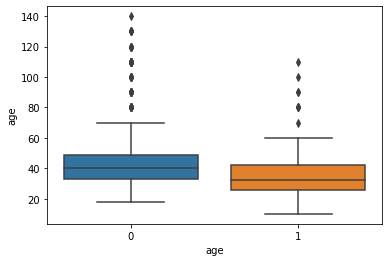

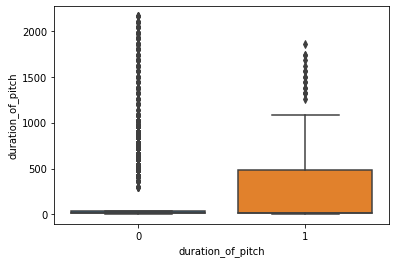

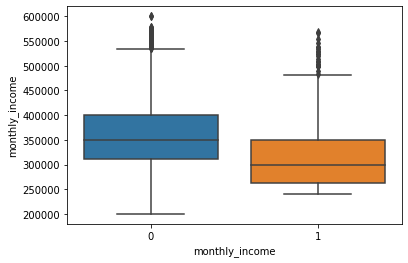

In [15]:
for col in CONT_COL:
    plt.subplots()
    sns.boxplot(data=train, y=col, x='prod_taken')
    plt.xlabel(f"{col}")

In [16]:
# len(train[col].loc[train['prod_taken']==1].values)

In [17]:
# for col in CONT_COL: 
#     # iqr 
#     prod_taken = train[col].loc[train['prod_taken']==1]
#     q25, q75 = prod_taken.quantile(0.25), prod_taken.quantile(0.75)
#     iqr = q75 - q25

#     cut_off = iqr * 1.5
#     q_low, q_hi = q25 - cut_off, q75 + cut_off
    
    
#     print(col, iqr, q_low, q_hi)

#     print(f"col: {col} before {len(train)}")
#     train = train[(train[col] < q_hi) & (train[col] > q_low)]
#     print(f"col: {col} after {len(train)} ")
    

In [18]:
# len(train)

In [19]:
# dist_visualization(train, test, NUM_COL)

In [20]:
# target

In [21]:
# seperate target from tarin
target = train["prod_taken"]
train = train.drop(columns=["prod_taken"])

In [22]:
# does missing happens randomly?
# train.isnull().sum().sum(), test.isnull().sum().sum()

In [23]:
# X = train.isna().astype(int).append(test.isna().astype(int))

In [24]:
# plt.figure(figsize=(15, 15))
# plt.scatter(projection_2D_train[:, 0], projection_2D_train[:, 1],
#             c=target,
#             edgecolor='none', 
#             alpha=0.80, 
#             s=10)
# plt.axis('off')
# plt.show();



# plt.figure(figsize=(15, 15))
# plt.scatter(projection_2D_test[:, 0], projection_2D_test[:, 1],
#             c=target,
#             edgecolor='none', 
#             alpha=0.80, 
#             s=10)
# plt.axis('off')
# plt.show();

In [25]:
# train["nan_count"] = train.isnull().sum(axis=1).astype('bool')

In [26]:
# train["nan_count"].value_counts()

In [27]:
# train[train["nan_count"]==False].prod_taken.value_counts()/len(train[train["nan_count"]==False])

In [28]:
# train[train["nan_count"]==True].prod_taken.value_counts()/len(train[train["nan_count"]==True])

In [29]:
# train.corr()

In [30]:
NUM_COL = []
CAT_COL = []

for col in test.columns:
#     if col == 'age':
#         continue
    if col == "passport" or test[col].dtype == object:
#     if col not in CONT_COL:

        CAT_COL.append(col)
    else:
        NUM_COL.append(col)

In [31]:
# CAT_COL

In [32]:
# 

In [33]:
# train["passport"]

In [34]:
# NUM_COL

In [35]:
# crete new feature based on features 
train["income_by_age"] = train["monthly_income"]/train["age"]
test["income_by_age"] = test["monthly_income"]/test["age"]
# train['age'] = train['age']//10
# test['age'] = test['age']//10

In [36]:

# train_df.reset_index(drop=True, inplace=True)
# test_df.reset_index(drop=True, inplace=True)

In [37]:
# train_df

In [38]:
# from sklearn.manifold import TSNE
# lowdim = TSNE()
# projection_2D_train = lowdim.fit_transform(train_df)
# projection_2D_test = lowdim.fit_transform(test_df)
# # projection_2D_train = projection_2D[:len(train), :]
# # projection_2D_test = projection_2D[len(test):, :]

# projection_2D_train = pd.DataFrame(projection_2D_train, columns=[
#                                f"tsne{i+1}" for i in range(2)])
# projection_2D_test = pd.DataFrame(projection_2D_test, columns=[
#                                f"tsne{i+1}" for i in range(2)])

In [39]:
# train_df = projection_2D_train
# test_df = projection_2D_test

In [40]:
# train_df = pd.concat([projection_2D_train, train_df], axis=1)
# test_df = pd.concat([projection_2D_test, test_df], axis=1)

In [41]:
# train_df

In [42]:
# test_df.head()

In [43]:
# # use top 10 feat 
# train_df = train_df[top10_feat]
# test_df = test_df[top10_feat]

In [44]:
# xgbbost with optuna

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna

def objective(trial):
    params = {
        "objective": "binary:logistic",
        "n_estimators": trial.suggest_int("n_estimators", 400, 1000),
        "verbosity": 0,
        'random_state': SEED,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    scores = []
    skf = StratifiedKFold(n_splits=5, random_state=1971, shuffle=True)
    for i, (train_index, valid_index) in enumerate(skf.split(train, target)):
    
        X_train, X_valid, y_train, y_valid = train.iloc[train_index], train.iloc[valid_index], target.iloc[train_index], target.iloc[valid_index]

        X_train, X_valid = create_features(X_train, X_valid, y_train, True)
    
        model = xgb.XGBClassifier(**params)
        model.fit(X_train, y_train, verbose=False)
        predictions = model.predict_proba(X_valid)
        auc_score = roc_auc_score(y_valid, predictions[:,1])
        scores.append(auc_score)
    return np.mean(scores)

In [45]:
sampler = optuna.samplers.TPESampler(seed=SEED)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=30)

[I 2024-08-10 20:27:59,713] A new study created in memory with name: no-name-3528e5dd-554a-4517-bb54-8a5d2a4bd3d0
[I 2024-08-10 20:28:08,466] Trial 0 finished with value: 0.8400600734059035 and parameters: {'n_estimators': 528, 'learning_rate': 0.018768615971126633, 'max_depth': 1, 'subsample': 0.6180301820309303, 'colsample_bytree': 0.9416678672737021, 'min_child_weight': 3}. Best is trial 0 with value: 0.8400600734059035.
[I 2024-08-10 20:28:16,182] Trial 1 finished with value: 0.8261912517732363 and parameters: {'n_estimators': 400, 'learning_rate': 0.04325282617332957, 'max_depth': 4, 'subsample': 0.6782592649320195, 'colsample_bytree': 0.5052408243898059, 'min_child_weight': 2}. Best is trial 0 with value: 0.8400600734059035.
[I 2024-08-10 20:28:39,139] Trial 2 finished with value: 0.8366729099133107 and parameters: {'n_estimators': 825, 'learning_rate': 0.0185496028231172, 'max_depth': 3, 'subsample': 0.24133046673504516, 'colsample_bytree': 0.40157749362207423, 'min_child_weight

[I 2024-08-10 20:35:44,317] Trial 25 finished with value: 0.8085585017516499 and parameters: {'n_estimators': 775, 'learning_rate': 0.09995698181014073, 'max_depth': 3, 'subsample': 0.7409651791924778, 'colsample_bytree': 0.42795068049662055, 'min_child_weight': 1}. Best is trial 21 with value: 0.8408872848619527.
[I 2024-08-10 20:36:10,287] Trial 26 finished with value: 0.8339702311753557 and parameters: {'n_estimators': 877, 'learning_rate': 0.04094096410722949, 'max_depth': 2, 'subsample': 0.908006174483629, 'colsample_bytree': 0.29938997387201693, 'min_child_weight': 3}. Best is trial 21 with value: 0.8408872848619527.
[I 2024-08-10 20:36:24,017] Trial 27 finished with value: 0.8403189993412102 and parameters: {'n_estimators': 682, 'learning_rate': 0.03794526591923844, 'max_depth': 1, 'subsample': 0.7538480038000419, 'colsample_bytree': 0.588102741640192, 'min_child_weight': 1}. Best is trial 21 with value: 0.8408872848619527.
[I 2024-08-10 20:36:37,362] Trial 28 finished with valu

In [46]:
print('Best hyperparameters:', study.best_params)
print('Best auc:', study.best_value)


Best hyperparameters: {'n_estimators': 758, 'learning_rate': 0.01899269365668951, 'max_depth': 1, 'subsample': 0.8312015667442509, 'colsample_bytree': 0.1658379077025716, 'min_child_weight': 1}
Best auc: 0.8408872848619527


In [47]:
# print('Best hyperparameters:', study.best_params)
# print('Best auc:', study.best_value)

In [101]:
params = study.best_params
params.update({"objective": "binary:logistic",
        "verbosity": 0,
        'random_state': SEED})

In [102]:
params

{'n_estimators': 758,
 'learning_rate': 0.01899269365668951,
 'max_depth': 1,
 'subsample': 0.8312015667442509,
 'colsample_bytree': 0.1658379077025716,
 'min_child_weight': 1,
 'objective': 'binary:logistic',
 'verbosity': 0,
 'random_state': 1971}

In [115]:
params = {'n_estimators': 528,
 'learning_rate': 0.018768615971126633,
 'max_depth': 1,
 'subsample': 0.6180301820309303,
 'colsample_bytree': 0.9416678672737021,
 'min_child_weight': 3,
 'objective': 'binary:logistic',
 'verbosity': 0,
 'random_state': 1971}

In [116]:
# k-fold validation
# import random
# random.seed(1971)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=5, random_state=1971, shuffle=True)



models = []
val_scores = []

scalers = []

for i, (train_index, valid_index) in enumerate(skf.split(train, target)):
    

    # under-sampleing 
#     train_index = random.choices(train_index, k=len(valid_index))
    X_train, X_valid, y_train, y_valid = train.iloc[train_index], train.iloc[valid_index], target.iloc[train_index], target.iloc[valid_index]
#     model = XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.01)
#     model.fit(
#     X_train, y_train,
#     eval_set=[(X_valid, y_valid)],  # Validation data
#     early_stopping_rounds=10,  # Stop training if validation score doesn't improve for 10 rounds
#     verbose=True  # Print training and validation metrics
# )
    X_train, X_valid = create_features(X_train, X_valid, y_train, False)
#     model = RandomForestClassifier(max_depth=5, random_state=1971)
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train, verbose=False)
#     model = models[2]
#     model = LogisticRegression(random_state=42)
#     model = SVC(gamma='auto', kernel='linear', probability=True)
#     scaler = StandardScaler()
#     X_train[NUM_COL] = scaler.fit_transform(X_train[NUM_COL])
#     X_valid[NUM_COL] = scaler.transform(X_valid[NUM_COL])
#     scalers.append(scaler)
    
#     model.fit(X_train, y_train)
#     models.append(model)
    
    train_pred = model.predict_proba(X_train)
    train_score = roc_auc_score(y_train, train_pred[:, 1])
    
#     pred = model.predict_proba(X_valid)
    pred = model.predict_proba(X_valid)
    val_score = roc_auc_score(y_valid, pred[:, 1])

    val_scores.append(val_score)
    
    print(f"Fold {i}: train score {train_score} val score: {val_score}")
    
print("val score (avg)", np.mean(val_scores))

Fold 0: train score 0.8524675458587695 val score: 0.8247157190635451
Fold 1: train score 0.8459498873127403 val score: 0.854314381270903
Fold 2: train score 0.8436772244003133 val score: 0.859580782786125
Fold 3: train score 0.8533027653940408 val score: 0.8192610579922767
Fold 4: train score 0.8492939845425961 val score: 0.8396337961555354
val score (avg) 0.8395011474536771


In [85]:
# basic modelling
# from sklearn.model_selection import train_test_split
# target = train["ProdTaken"]
# X_train, X_valid, y_train, y_valid = train_test_split(train_df, target, random_state = 42)
# print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

# model = RandomForestClassifier(random_state=42)
# model = LogisticRegression(random_state=42)
# model.fit() で学習します。訓練データと訓練データの目的変数を指定します。
# model.fit(X_train, y_train)
# pred = model.predict_proba(X_valid)
# score = roc_auc_score(y_valid, pred[:, 1])
# print(score)


# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_valid, pred[:, 1])

# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr,tpr,label='LogisticRegression')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

In [117]:
train_df, test_df = create_features(train, test, target, False)
# model.fit(train_df, target)
# models.append(model)

# train_pred = model.predict_proba(train_df)
# train_score = roc_auc_score(target, train_pred[:, 1])

# print(train_score)

In [118]:
# all data 

modelall = xgb.XGBClassifier(**params)
modelall.fit(train_df, target, verbose=False)

train_pred = modelall.predict_proba(train_df)
train_score = roc_auc_score(target, train_pred[:, 1])
print(train_score)

0.8472600307728725


In [61]:
# val_scores = np.array(val_scores)

In [62]:
def plot_importance(model, feature_names, topk=10):
    # plot feature importance
    if isinstance(model, RandomForestClassifier):
        importances = model.feature_importances_
        std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
        forest_importances = pd.Series(importances, index=feature_names)
        forest_importances = forest_importances.nlargest(topk)
        fig, ax = plt.subplots(figsize=(8,5))
        forest_importances.plot.bar( ax=ax)
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("importance")
        fig.tight_layout()
        return forest_importances

In [63]:
feat_importance = plot_importance(model, train_df.columns)

In [64]:
# top10_feat = feat_importance.index.tolist()

In [119]:
models = [modelall]
weighted_val = [1]

In [120]:
# weighted_val = val_scores /np.sum(val_scores)

In [121]:
weighted_val

[1]

In [122]:
# weighted_val = [1]
# models = [model]

In [123]:
# submission
predict = np.zeros((len(test_df), 2))
for model, weight in zip(models,weighted_val):
#     test_df[NUM_COL] = scaler.transform(test_df[NUM_COL])
    predict += weight*model.predict_proba(test_df)
# predict = predict/5

submit = pd.read_csv("../data/sample_submit.csv", header=None)
submit.head()

,0,1
0,3489,0.119451
1,3490,0.343575
2,3491,0.119451
3,3492,0.119451
4,3493,0.119451


In [124]:
submit[1] = predict[:, 1]

In [125]:
submit.to_csv("submission.csv", index=False, header=None)

In [126]:
# submit[1].value_counts()

In [127]:
sum(submit.loc[:, 1]> .5)

147

In [81]:
# submit

In [82]:
# submit_old = submit

In [ ]:
# plt.scatter(x=submit[1], y=submit_old[1])

In [ ]:
# (submit[1] == submit_old[1]).sum()